<a href="https://colab.research.google.com/github/SrujanV010/Heart-Disease-Predictor/blob/main/HeartFailurePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read the DataSet

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Major project/heart.csv')

### Understanding the dataset

Attribute Information:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]


In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [9]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [10]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

In [11]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [12]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [13]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [14]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Count of people with and without HeartDisease')

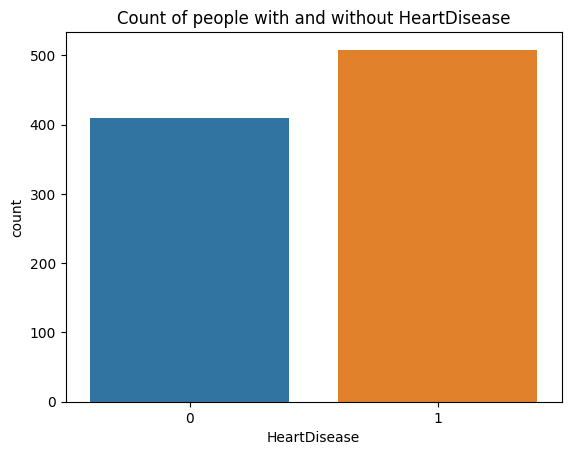

In [15]:
sns.countplot(x='HeartDisease',data=df)
plt.title('Count of people with and without HeartDisease')

### Data Cleaning

Text(0.5, 1.0, 'Distribution of Cholesterol Levels')

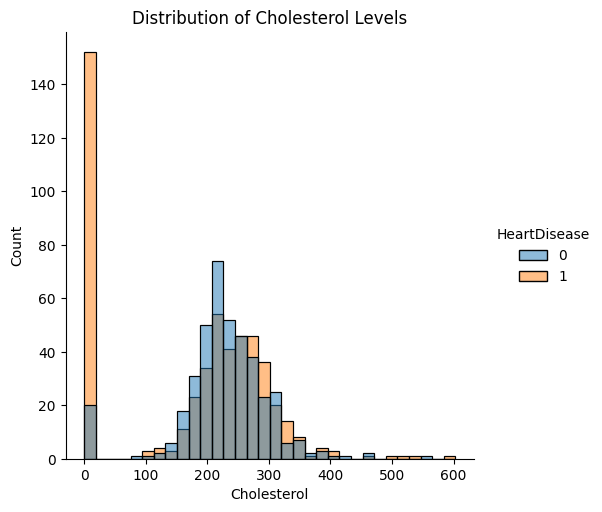

In [16]:
sns.displot(x='Cholesterol',data=df,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels')

In [17]:
df[(df['Cholesterol']==0)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115            0          0     Normal   
294   32   M            TA         95            0          1     Normal   
295   61   M           ASY        105            0          1     Normal   
296   50   M           ASY        145            0          1     Normal   
297   57   M           ASY        110            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
514   43   M           ASY        122            0          0     Normal   
515   63   M           NAP        130            0          1         ST   
518   48   M           NAP        102            0          1         ST   
535   56   M           ASY        130            0          0        LVH   
536   62   M           NAP        133            0          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1  
..     ...            ...      ...      ...           ...  
514    120              N      0.5       Up             1  
515    160              N      3.0     Flat             0  
518    110              Y      1.0     Down             1  
535    122              Y      1.0     Flat             1  
536    119              Y      1.2     Flat             1  

[172 rows x 12 columns]

In [18]:
df_fill = df.copy()

In [19]:
def fill_cholesterol(value):
  if value == 0:
    return df['Cholesterol'].mean()
  else:
    return value

In [20]:
df_fill['Cholesterol'] = df_fill['Cholesterol'].apply(fill_cholesterol)

In [21]:
df_fill.loc[[293,294,295,296,297]]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
293   65   M           ASY        115   198.799564          0     Normal   
294   32   M            TA         95   198.799564          1     Normal   
295   61   M           ASY        105   198.799564          1     Normal   
296   50   M           ASY        145   198.799564          1     Normal   
297   57   M           ASY        110   198.799564          1         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
293     93              Y      0.0     Flat             1  
294    127              N      0.7       Up             1  
295    110              Y      1.5       Up             1  
296    139              Y      0.7     Flat             1  
297    131              Y      1.4       Up             1

Text(0.5, 1.0, 'Distribution of Cholesterol Levels after filling')

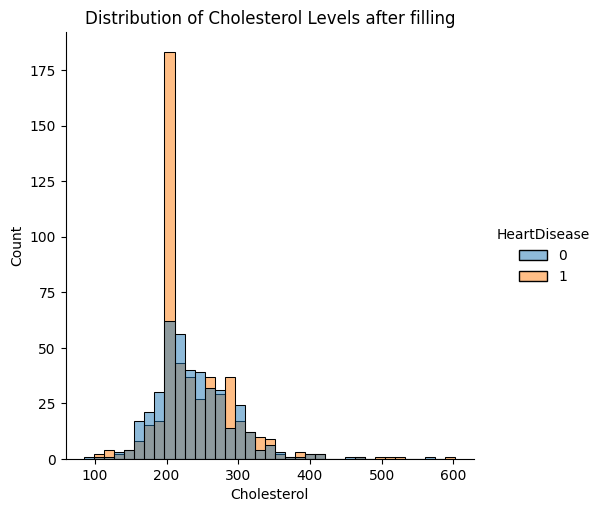

In [22]:
sns.displot(x='Cholesterol',data=df_fill,hue='HeartDisease')
plt.title('Distribution of Cholesterol Levels after filling')

Text(0.5, 1.0, 'Distribution of RestingBP')

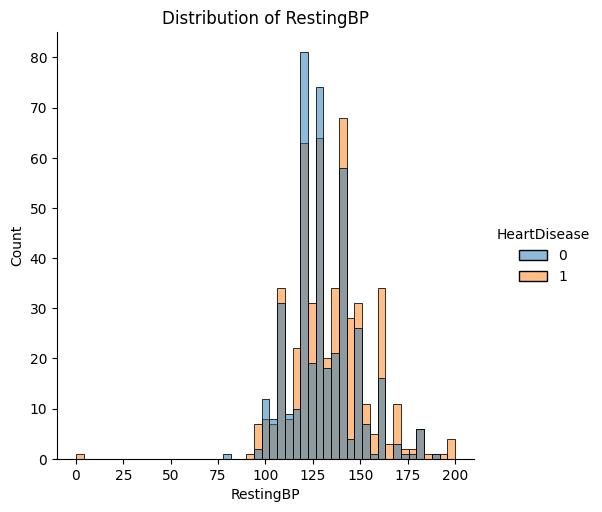

In [23]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP')

In [24]:
df_fill[(df_fill['RestingBP']==0)]

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
449   55   M           NAP          0   198.799564          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
449    155              N      1.5     Flat             1

In [25]:
df_fill.loc[449, 'RestingBP'] = df_fill['RestingBP'].mean()

In [26]:
df_fill.loc[449]

Age                       55
Sex                        M
ChestPainType            NAP
RestingBP         132.396514
Cholesterol       198.799564
FastingBS                  0
RestingECG            Normal
MaxHR                    155
ExerciseAngina             N
Oldpeak                  1.5
ST_Slope                Flat
HeartDisease               1
Name: 449, dtype: object

Text(0.5, 1.0, 'Distribution of RestingBP after filling')

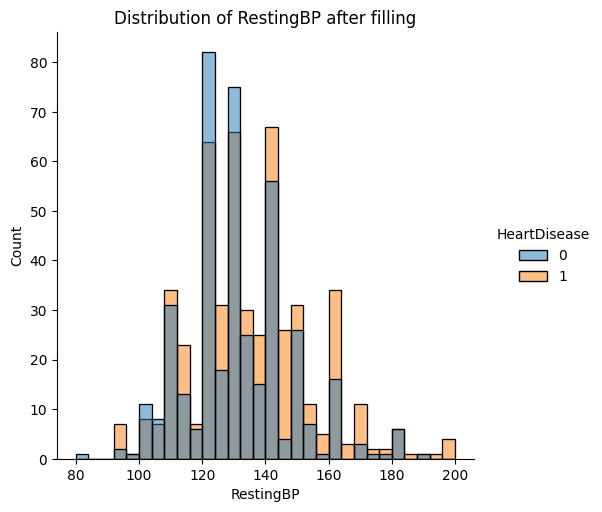

In [27]:
sns.displot(x='RestingBP',data=df_fill,hue='HeartDisease')
plt.title('Distribution of RestingBP after filling')

### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Age')

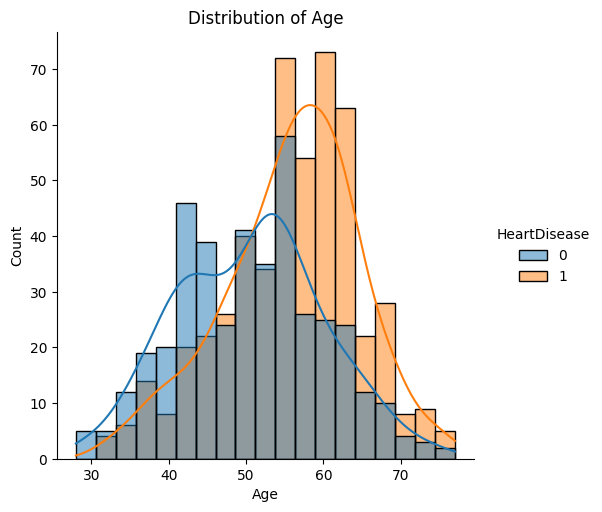

In [28]:
sns.displot(x='Age',data=df_fill,kde=True,hue='HeartDisease')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender & Heart Disease')

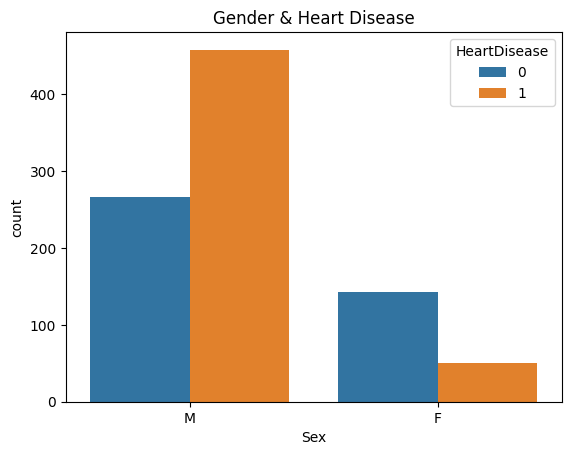

In [29]:
sns.countplot(x='Sex',data=df_fill,hue='HeartDisease')
plt.title('Gender & Heart Disease')

Text(0.5, 1.0, 'ChestPainType & Heart Disease')

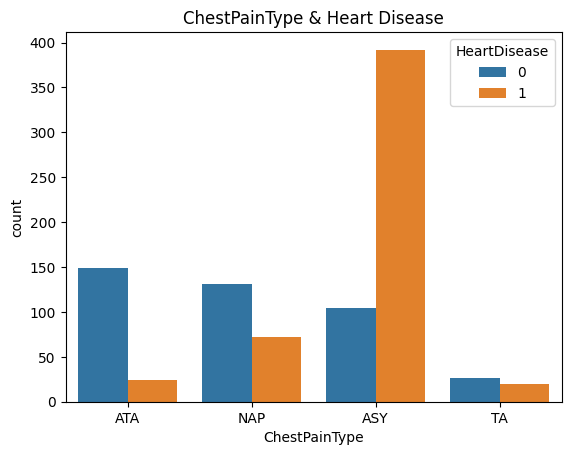

In [30]:
sns.countplot(x='ChestPainType',data=df_fill,hue='HeartDisease')
plt.title('ChestPainType & Heart Disease')

Text(0.5, 1.0, 'FastingBS & Heart Disease')

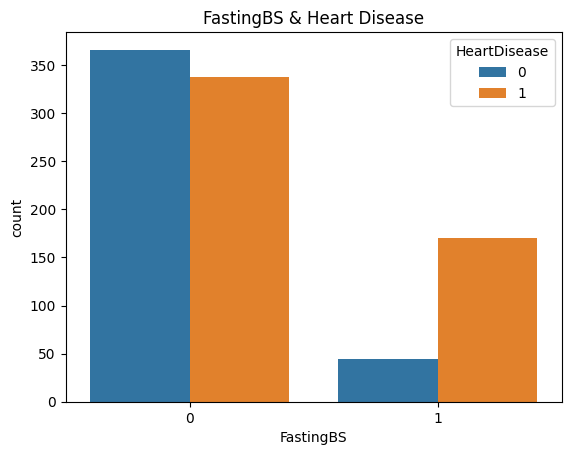

In [31]:
sns.countplot(x='FastingBS',hue='HeartDisease',data=df_fill)
plt.title('FastingBS & Heart Disease')# 1 - greater than 120; 0 - otherwise

<Figure size 960x640 with 0 Axes>

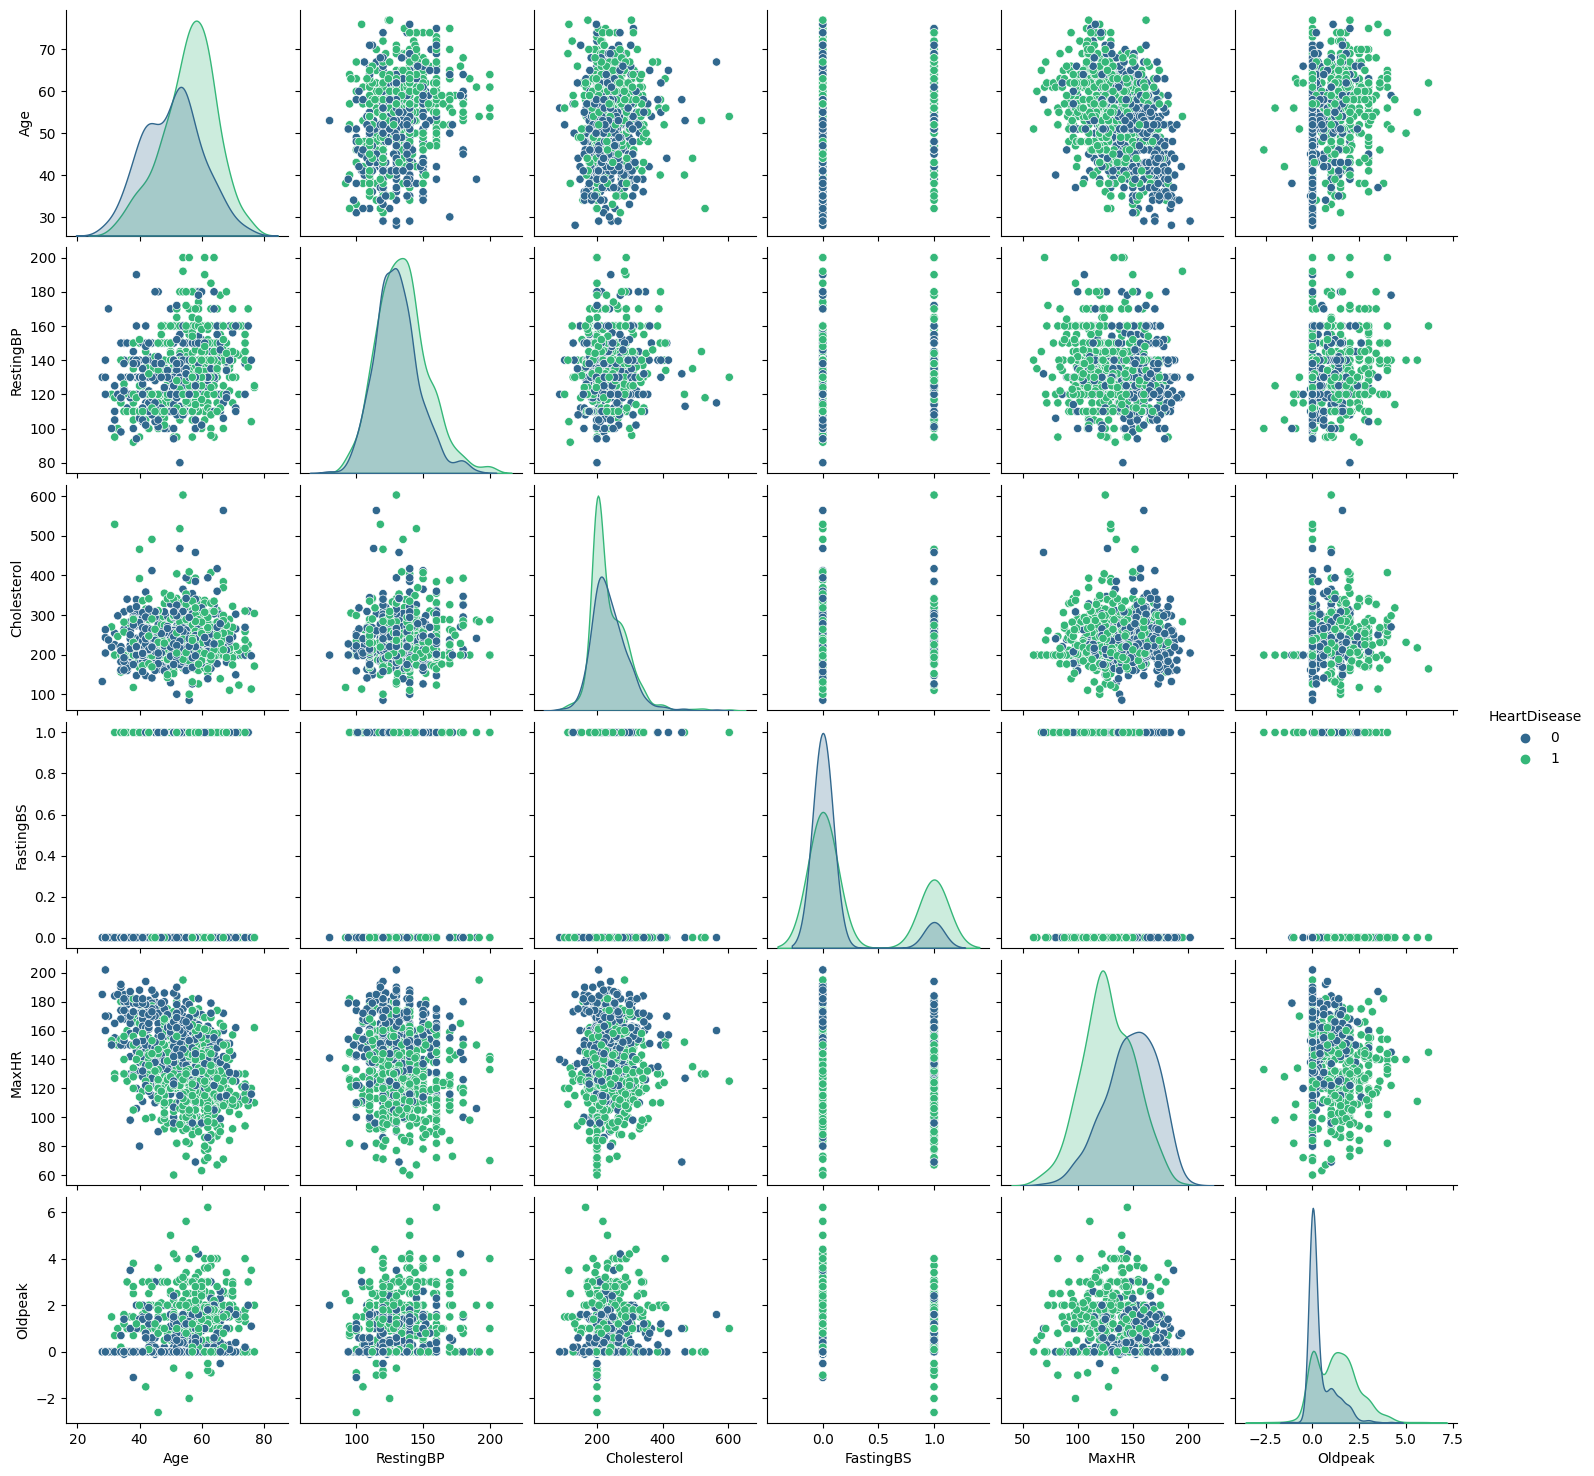

In [32]:
plt.figure(figsize=(12,8),dpi=80)
sns.pairplot(data=df_fill,hue='HeartDisease',palette='viridis')


Text(0.5, 1.0, 'Age vs Sex')

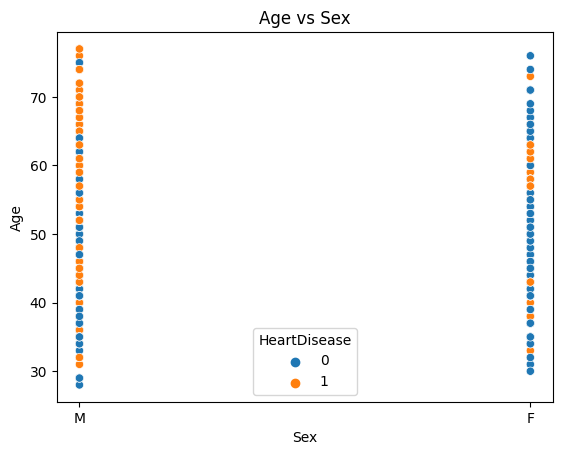

In [33]:
sns.scatterplot(y='Age',x='Sex',data=df_fill,hue='HeartDisease')
plt.title("Age vs Sex")

Text(0.5, 1.0, 'Age vs RestingBP')

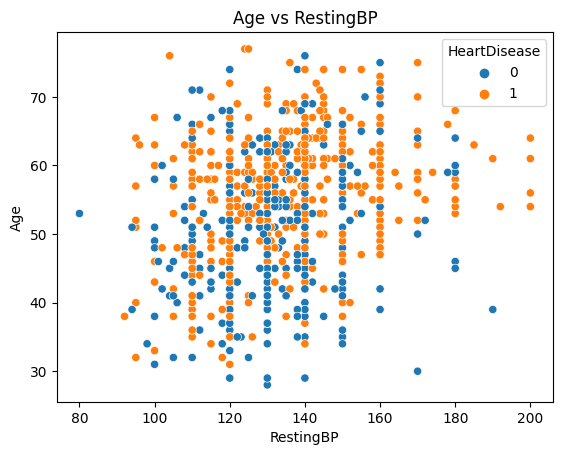

In [34]:
sns.scatterplot(x='RestingBP',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs RestingBP')

Text(0.5, 1.0, 'Age vs Cholesterol')

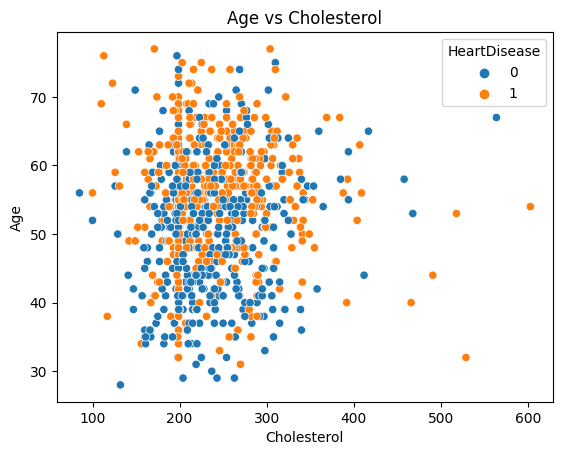

In [35]:
sns.scatterplot(x='Cholesterol',y='Age',data=df_fill,hue='HeartDisease')
plt.title('Age vs Cholesterol')

### Checking for Outliers

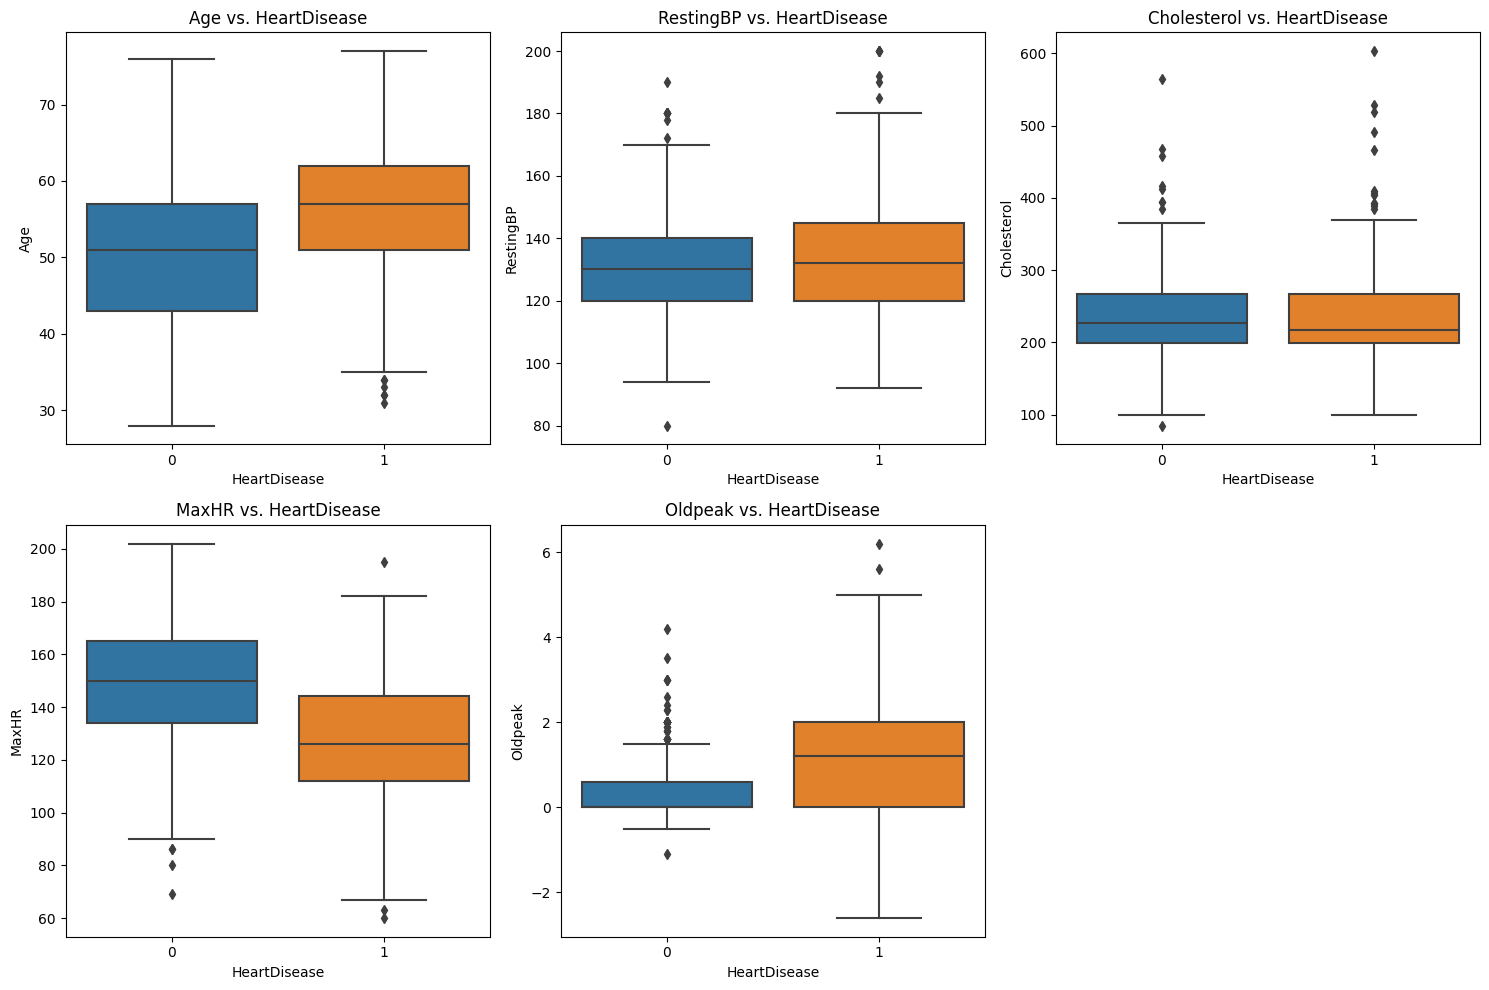

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for i in range(2):
    for j in range(3):
        if columns:
            column = columns.pop(0)
            sns.boxplot(x='HeartDisease', y=column, data=df_fill, ax=axes[i, j])
            axes[i, j].set_title(f'{column} vs. HeartDisease')
        else:
            axes[i, j].remove()

plt.tight_layout()

### Checking Correlation

<ipython-input-37-1673e78a2ac3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_fill.corr(),annot=True)


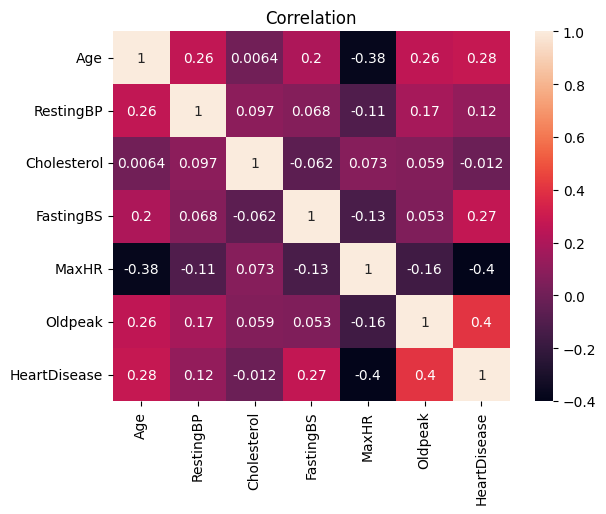

In [37]:
sns.heatmap(df_fill.corr(),annot=True)
plt.title('Correlation');

In [38]:
df_fill.corr()['HeartDisease'].sort_values(ascending=True)

<ipython-input-38-d07d4c6423fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fill.corr()['HeartDisease'].sort_values(ascending=True)


MaxHR          -0.400421
Cholesterol    -0.012340
RestingBP       0.117930
FastingBS       0.267291
Age             0.282039
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

In [39]:
abs(df_fill.corr()['HeartDisease']).sort_values(ascending=True)

<ipython-input-39-fda53d4439b6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df_fill.corr()['HeartDisease']).sort_values(ascending=True)


Cholesterol     0.012340
RestingBP       0.117930
FastingBS       0.267291
Age             0.282039
MaxHR           0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

<ipython-input-40-0bc16b3e3767>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)


<Axes: >

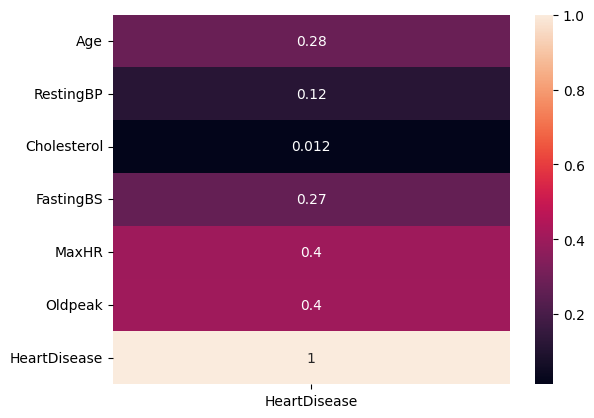

In [40]:
sns.heatmap(abs(df_fill.corr()['HeartDisease']).to_frame(),annot=True)

In [41]:
df_dummy = pd.get_dummies(df_fill,columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

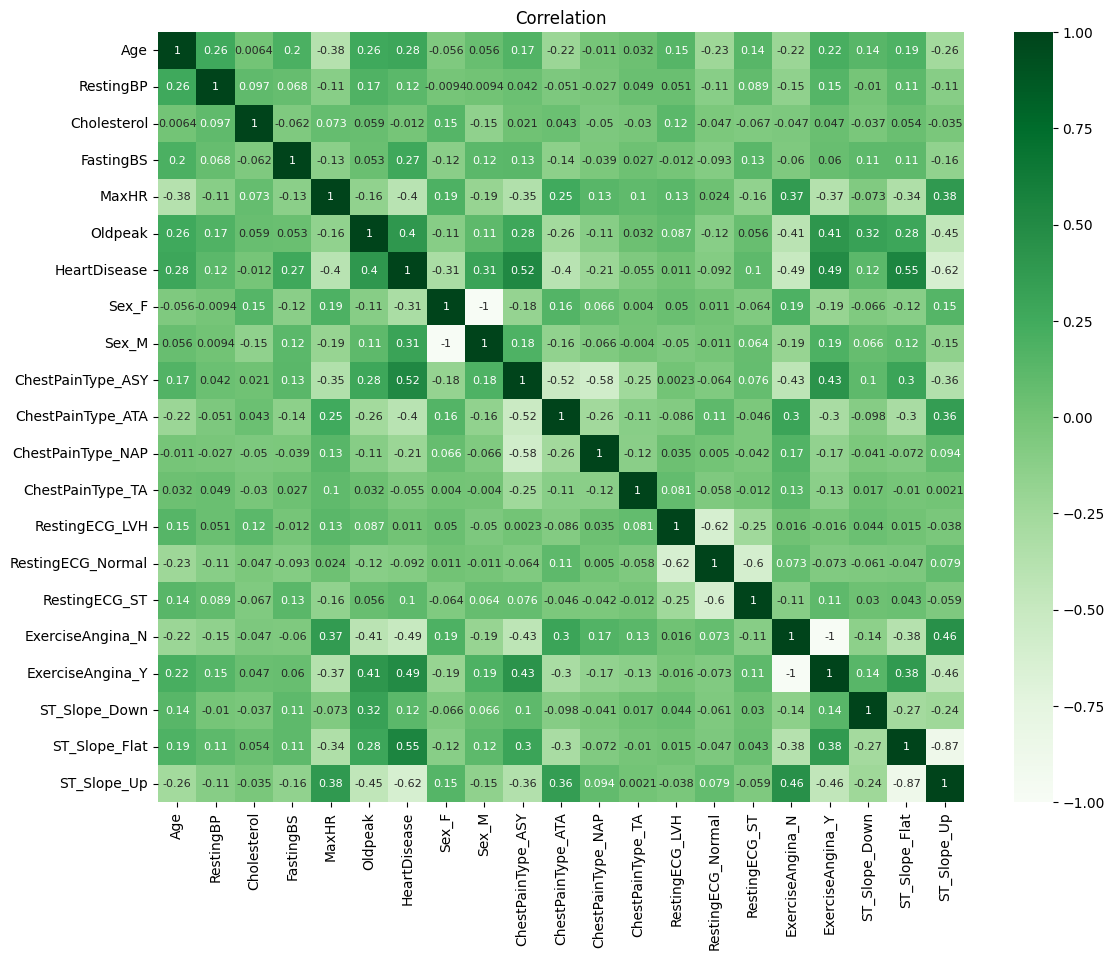

In [42]:
plt.figure(figsize=(13,10))
sns.heatmap(df_dummy.corr(), annot=True, annot_kws={"size": 8},cmap='Greens')
plt.title('Correlation');

In [43]:
df_dummy.corr()['HeartDisease'].sort_values(ascending=True)

ST_Slope_Up         -0.622164
ExerciseAngina_N    -0.494282
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Sex_F               -0.305445
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
Cholesterol         -0.012340
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex_M                0.305445
Oldpeak              0.403951
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

In [44]:
abs(df_dummy.corr()['HeartDisease']).sort_values(ascending=True)

RestingECG_LVH       0.010670
Cholesterol          0.012340
ChestPainType_TA     0.054790
RestingECG_Normal    0.091580
RestingECG_ST        0.102527
RestingBP            0.117930
ST_Slope_Down        0.122527
ChestPainType_NAP    0.212964
FastingBS            0.267291
Age                  0.282039
Sex_F                0.305445
Sex_M                0.305445
MaxHR                0.400421
ChestPainType_ATA    0.401924
Oldpeak              0.403951
ExerciseAngina_N     0.494282
ExerciseAngina_Y     0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
ST_Slope_Up          0.622164
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

Text(0.5, 1.0, 'Oldpeak vs Heartdisease')

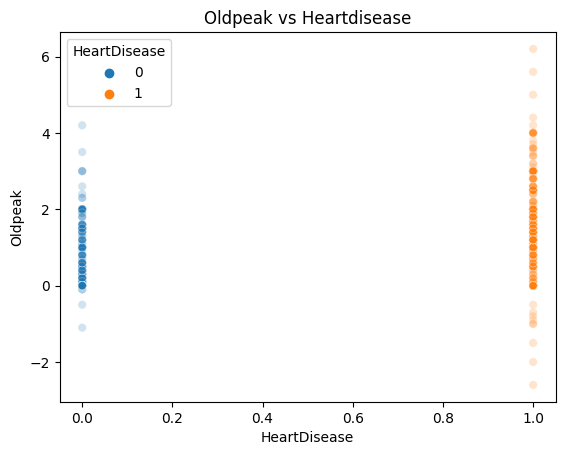

In [45]:
sns.scatterplot(x='HeartDisease',y='Oldpeak',data=df_dummy,hue='HeartDisease',alpha=0.2)
plt.title('Oldpeak vs Heartdisease')

Text(0.5, 1.0, 'Distribution of Oldpeak')

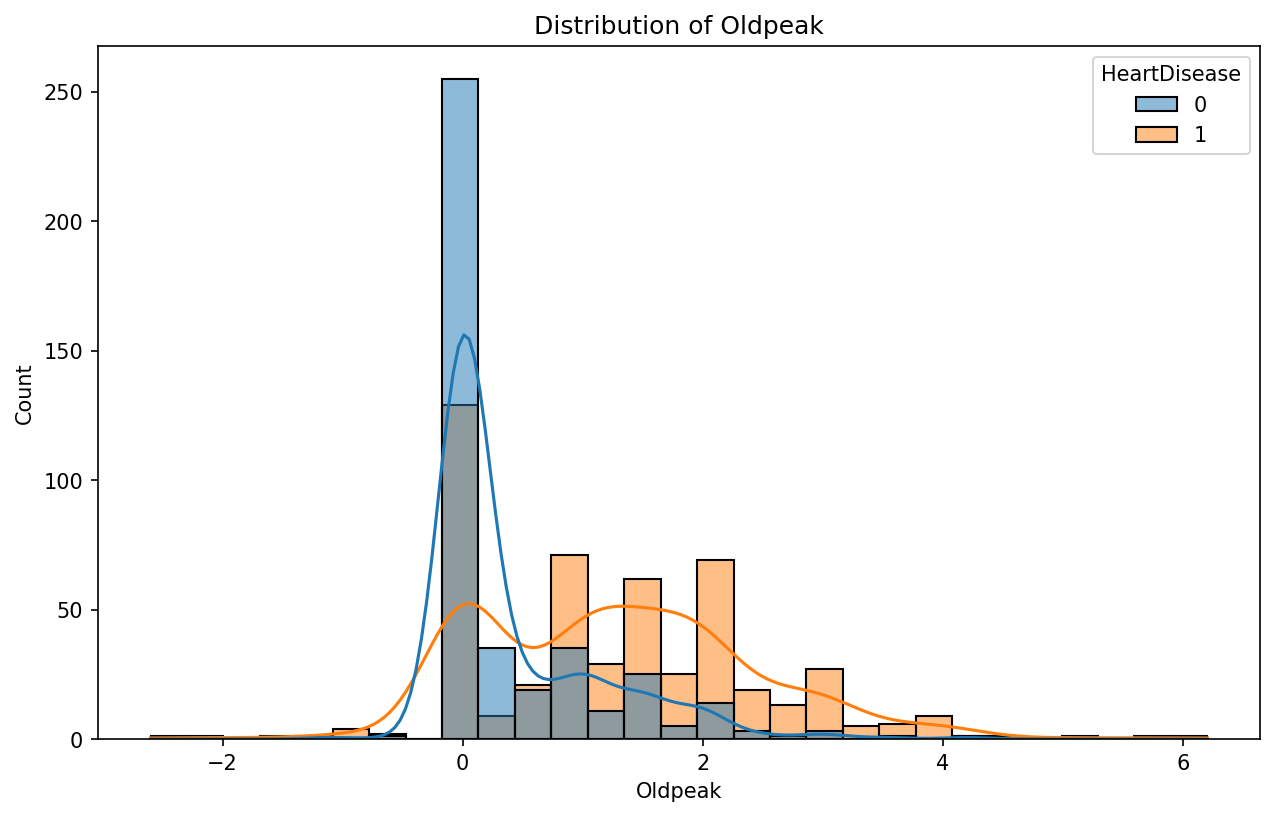

In [46]:
plt.figure(figsize=(10,6),dpi=150)
sns.histplot(x='Oldpeak',data=df_dummy,kde=True,hue='HeartDisease')
plt.title('Distribution of Oldpeak')

### **Model**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
X = df_dummy.drop(['HeartDisease'],axis=1)
y = df_dummy['HeartDisease']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
scaler = StandardScaler()

In [51]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### K-Nearest Neighbours

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [54]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn_model.predict(scaled_X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [57]:
accuracy_score(y_test,y_pred)

0.855072463768116

In [58]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, scaled_X_train, y_train, cv=5)

# Calculate mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}")

Cross-Validation Scores: [0.87596899 0.86821705 0.8515625  0.8359375  0.8125    ]
Mean Accuracy: 0.8488 +/- 0.0228


In [59]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[104,  22],
       [ 18, 132]])

Text(0.5, 1.0, 'Confusion Matrix')

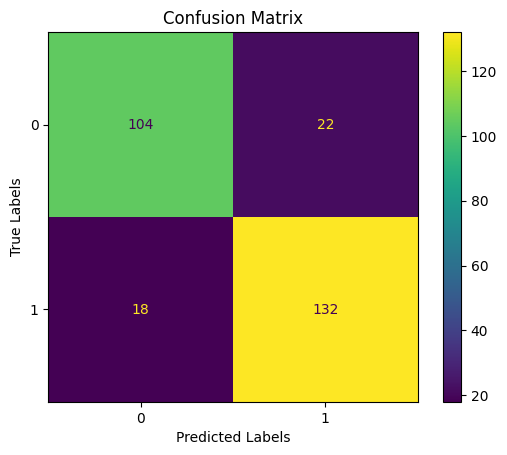

In [60]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       126
           1       0.86      0.88      0.87       150

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [62]:
test_error_rates = []

for n in range(1,101):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(scaled_X_train,y_train)
  y_pred = knn.predict(scaled_X_test)


  error = 1 - accuracy_score(y_test,y_pred)
  test_error_rates.append(error)

Text(0.5, 0, 'K Value')

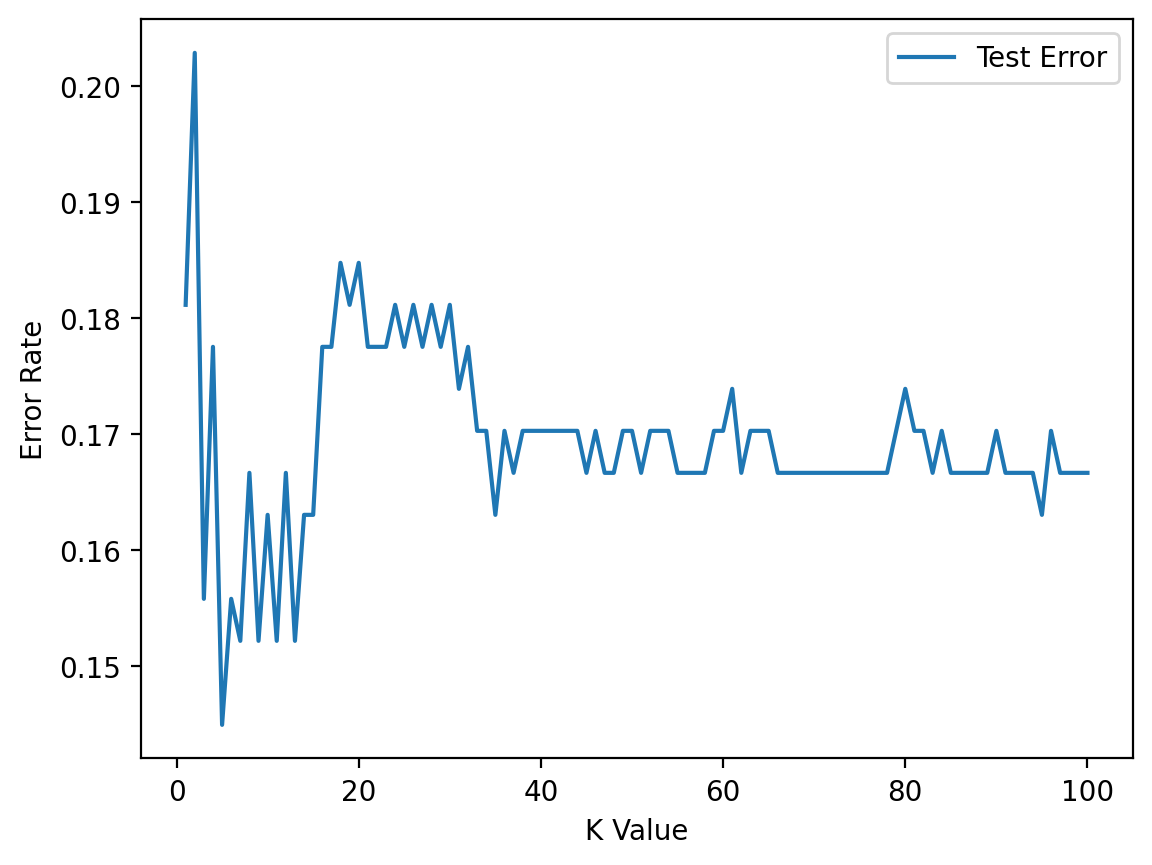

In [63]:
plt.figure(dpi=200)
plt.plot(range(1,101),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Define the parameters for grid search
param_grid = {
    'n_neighbors':[3, 5, 7, 9],  # Varying number of neighbors
    'weights': ['uniform', 'distance'],  # Different weighting schemes
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Different algorithms
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your data
grid_knn.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [66]:
best_params = grid_knn.best_params_
best_knn = grid_knn.best_estimator_
predictions = best_knn.predict(scaled_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy:  0.8478260869565217


In [67]:
cm = confusion_matrix(y_test,predictions)
cm

array([[104,  22],
       [ 20, 130]])

Text(0.5, 1.0, 'Confusion Matrix')

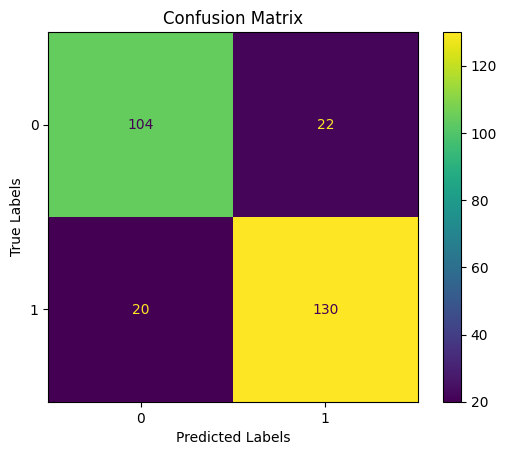

In [68]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [69]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       126
           1       0.86      0.87      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



### Decision trees

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
base_pred = model.predict(X_test)

In [72]:
cm = confusion_matrix(y_test,base_pred)
cm

array([[ 95,  31],
       [ 32, 118]])

In [73]:
accuracy_score(y_test,base_pred)

0.7717391304347826

In [74]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       126
           1       0.79      0.79      0.79       150

    accuracy                           0.77       276
   macro avg       0.77      0.77      0.77       276
weighted avg       0.77      0.77      0.77       276



Text(0.5, 1.0, 'Confusion Matrix')

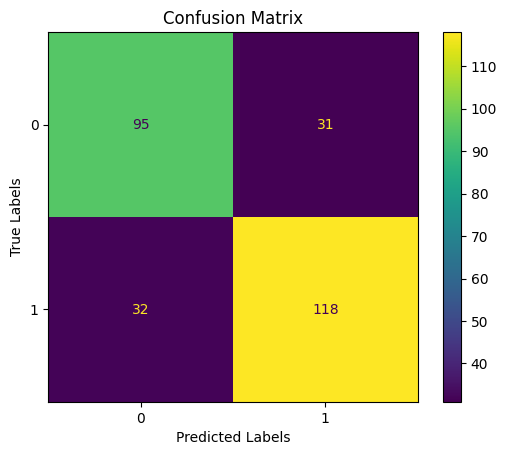

In [75]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [76]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

Feature Importance
Age                          0.043300
RestingBP                    0.073173
Cholesterol                  0.051614
FastingBS                    0.038756
MaxHR                        0.110189
Oldpeak                      0.067839
Sex_F                        0.000000
Sex_M                        0.041760
ChestPainType_ASY            0.097449
ChestPainType_ATA            0.000000
ChestPainType_NAP            0.001052
ChestPainType_TA             0.000482
RestingECG_LVH               0.001910
RestingECG_Normal            0.003368
RestingECG_ST                0.005338
ExerciseAngina_N             0.037957
ExerciseAngina_Y             0.003157
ST_Slope_Down                0.008419
ST_Slope_Flat                0.005964
ST_Slope_Up                  0.408272

In [77]:
tree_classifier = DecisionTreeClassifier()

# Define the hyperparameters grid for grid search
param_grid = {
    'max_depth': [None, 5, 10, 15],  # Varying maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],  # Varying min samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6]  # Varying min samples required at each leaf node
}
# Create a GridSearchCV object
grid_tree = GridSearchCV(tree_classifier, param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [78]:
best_params = grid_tree.best_params_
best_dt = grid_tree.best_estimator_
predictions = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy:  0.8442028985507246


In [79]:
cm = confusion_matrix(y_test,predictions)
cm

array([[109,  17],
       [ 26, 124]])

Text(0.5, 1.0, 'Confusion Matrix')

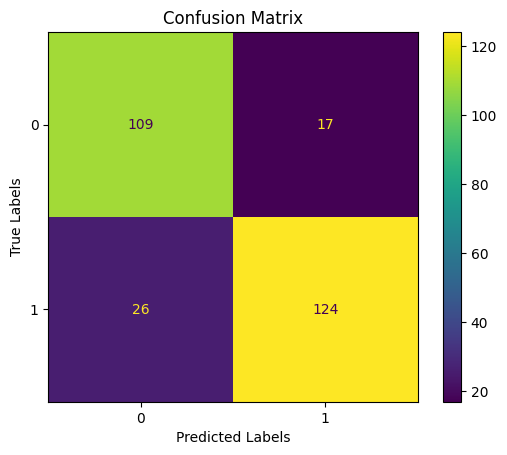

In [80]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.88      0.83      0.85       150

    accuracy                           0.84       276
   macro avg       0.84      0.85      0.84       276
weighted avg       0.85      0.84      0.84       276



### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=54)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=10, random_state=54)

In [83]:
preds = model.predict(X_test)

In [84]:
accuracy_score(y_test,preds)

0.8369565217391305

In [85]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='auto',random_state=54)
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

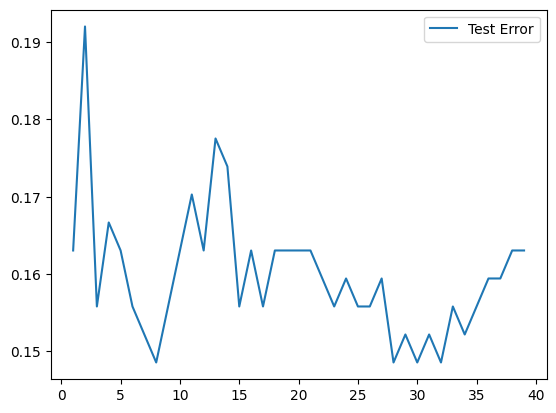

In [86]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

(1.0, 20.0)

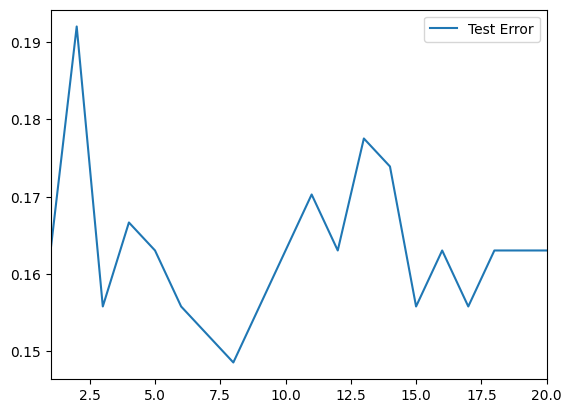

In [87]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()
plt.xlim(1,20)

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=8,max_features='auto',random_state=54)
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=8, random_state=54)

In [89]:
preds = model.predict(X_test)

In [90]:
accuracy_score(y_test,preds)

0.8514492753623188

In [91]:
cm = confusion_matrix(y_test,preds)
cm

array([[110,  16],
       [ 25, 125]])

Text(0.5, 1.0, 'Confusion Matrix')

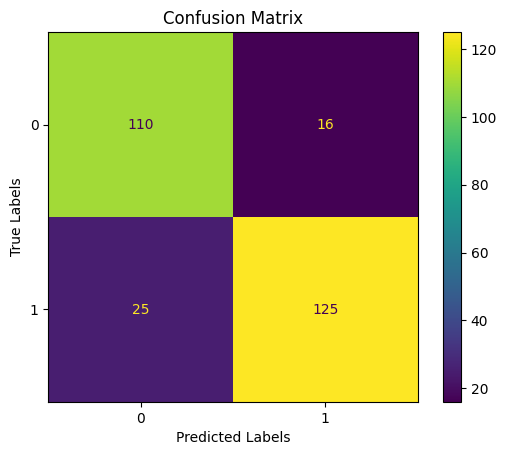

In [92]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [93]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       126
           1       0.89      0.83      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [94]:
n_estimators = [64,100,128,200]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
     'random_state': [54]
}

rfc = RandomForestClassifier()
grid_forest = GridSearchCV(rfc,param_grid)


grid_forest.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False], 'random_state': [54]})

In [95]:
predictions = grid_forest.predict(X_test)

In [96]:
accuracy_score(y_test,predictions)

0.8442028985507246

In [97]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.85      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [98]:
cm = confusion_matrix(y_test,predictions)
cm

array([[105,  21],
       [ 22, 128]])

Text(0.5, 1.0, 'Confusion Matrix')

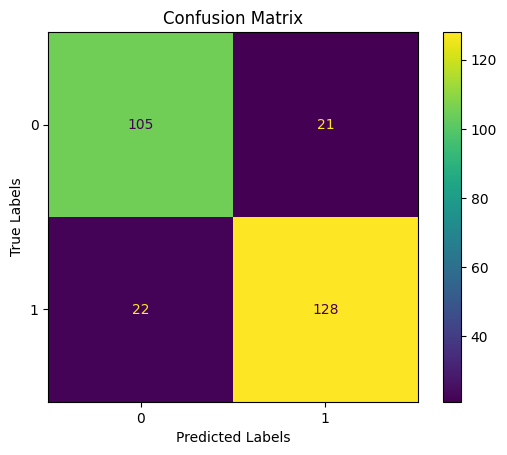

In [99]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [100]:
best_params = grid_forest.best_params_
best_rf = grid_forest.best_estimator_
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Best Parameters:", best_params)
print('Accuracy: ', accuracy)


Best Parameters: {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 100, 'oob_score': False, 'random_state': 54}
Accuracy:  0.8442028985507246


### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_model = LogisticRegression()

In [103]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [104]:
y_pred = log_model.predict(scaled_X_test)

In [105]:
accuracy_score(y_test,y_pred)

0.8297101449275363

In [106]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  26],
       [ 21, 129]])

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       126
           1       0.83      0.86      0.85       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



Text(0.5, 1.0, 'Confusion Matrix')

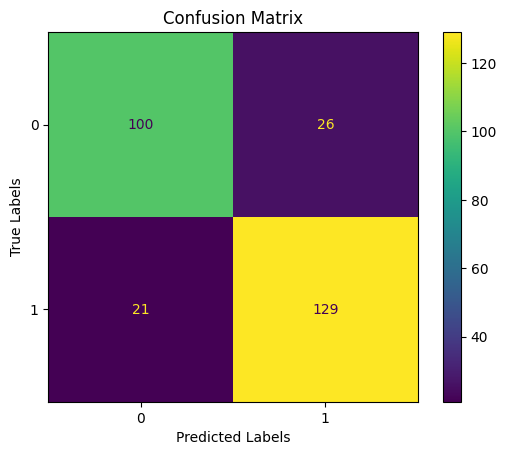

In [108]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [109]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength

    'solver': ['liblinear', 'saga']  # Algorithm to use in optimization problem
}

logistic = LogisticRegression(max_iter=10000)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8405797101449275


In [110]:
cm = confusion_matrix(y_test,predictions)
cm

array([[101,  25],
       [ 19, 131]])

In [111]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



Text(0.5, 1.0, 'Confusion Matrix')

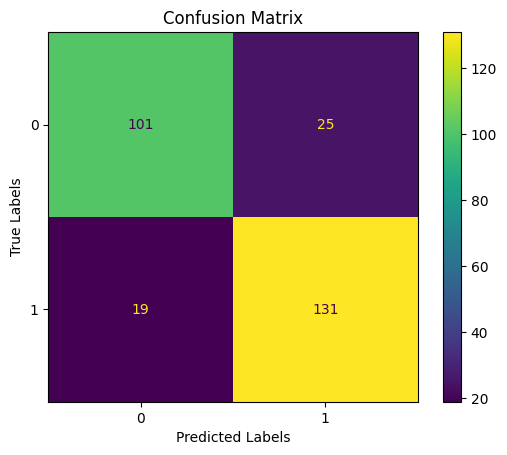

In [112]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

Plot precision recall curve to see how well the positives are correctly classified

In [113]:
from sklearn.metrics import precision_recall_curve

Text(0.5, 1.0, 'Precision-Recall curve for HeartDisease present')

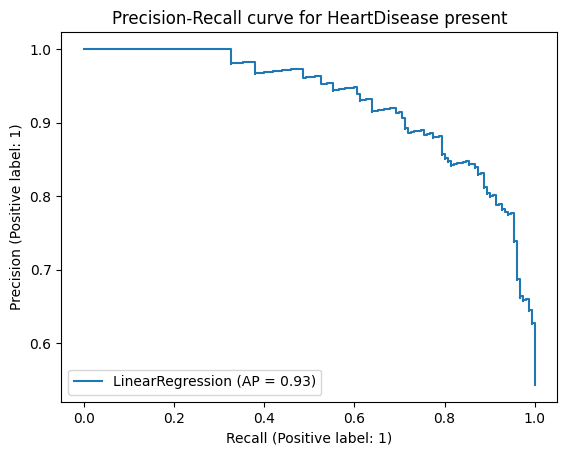

In [114]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test, name="LinearRegression")
display.ax_.set_title("Precision-Recall curve for HeartDisease present")

Identifying positive class(1) while avoiding misclassification of negative class(0) using ROC(Receiver Operating Characteristic Curve)

In [115]:
from sklearn.metrics import RocCurveDisplay

Text(0.5, 1.0, 'ROC Curve for HeartDisease-present')

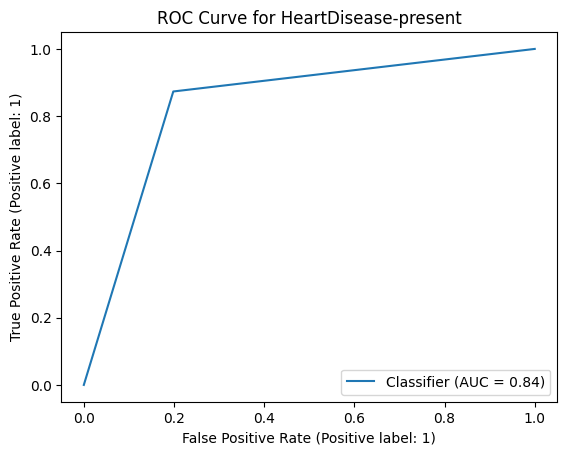

In [116]:
RocCurveDisplay.from_predictions(y_test, predictions)
plt.title('ROC Curve for HeartDisease-present')

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Example data loading (replace with your own dataset)
df = pd.read_csv("C:/Users/Bhoomika/heart.csv")  # Adjust the path to your dataset

# Separate features (X) and target (y)
X = df.drop("HeartDisease", axis=1)  # Use 'HeartDisease' as the target column
y = df["HeartDisease"]

# Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("Missing values in target:\n", y.isnull().sum())

# Drop missing values if necessary
X = X.dropna()
y = y.dropna()

# Check the data types of the features
print("Data types of features:\n", X.dtypes)

# Convert categorical columns to numeric if necessary (e.g., using one-hot encoding)
# X = pd.get_dummies(X)  # Uncomment if your dataset has categorical features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

# Check the shapes of the data
print("Training data shape:", X_train.shape)
print("Training target shape:", y_train.shape)

# Define the parameter grid for RandomForestClassifier
n_estimators = [64, 100, 128, 200]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]
oob_score = [True, False]

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
    'random_state': [54]
}

# Initialize RandomForestClassifier
rfc = RandomForestClassifier()

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid
grid_forest = GridSearchCV(rfc, param_grid)

# Fit the grid search to the training data
grid_forest.fit(X_train, y_train)

# Display the best parameters found by GridSearchCV
print("Best parameters found:", grid_forest.best_params_)

# Get the best model (the model with the best parameters)
best_model = grid_forest.best_estimator_

# Save the best model to your desktop using joblib
joblib.dump(best_model, r"C:\Users\Bhoomika\Desktop\best_rf_model.pkl")

print("Best RandomForest model saved to your desktop!")


Missing values in features:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64
Missing values in target:
 0
Data types of features:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
dtype: object
Training data shape: (734, 11)
Training target shape: (734,)


ValueError: 
All the 240 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 363, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 1192, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 951, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Bhoomika\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\pandas\core\generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'M'


In [16]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -------- ---------------------------- 41.0/168.5 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 112.6/168.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 168.5/168.5 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 2.2 MB/s eta 0:00:04
    --------------------------------------- 0.1/7.8 MB 1.2 MB/s eta 0:00:07
   - -------------------------------------- 0.2/7.8 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.8 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.8 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.8 MB 1.6 MB/s eta 0:00:05
   -- ------------------------------------- 0.5/7.8 MB 1.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/7.8 MB 1.7 MB/s eta 0:00:05
   --- ---

Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



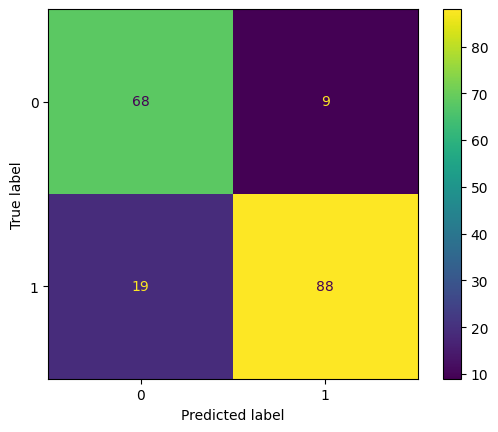

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'X' and 'y' are your feature matrix and target variable

# Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Model saved as C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl


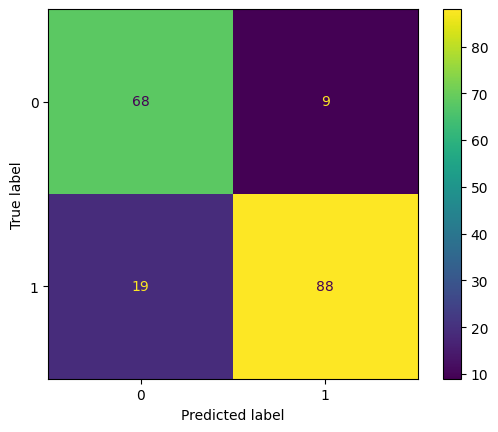

In [21]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Assuming 'X' and 'y' are your feature matrix and target variable

# Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Save the model to a .pkl file on your desktop
model_filename = r'C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl'
joblib.dump(log_model, model_filename)
print(f"Model saved as {model_filename}")


In [27]:
# Coefficients of the model
coefficients = log_model.coef_[0]
features = X.columns
coef_df = pd.DataFrame(list(zip(features, coefficients)), columns=['Feature', 'Coefficient'])
print(coef_df)


           Feature  Coefficient
0              Age     0.138855
1              Sex     0.497190
2    ChestPainType    -0.565943
3        RestingBP     0.064559
4      Cholesterol    -0.493395
5        FastingBS     0.404029
6       RestingECG    -0.174062
7            MaxHR    -0.200766
8   ExerciseAngina     0.626233
9          Oldpeak     0.483624
10        ST_Slope    -1.009281


In [28]:
import numpy as np

# Calculate odds ratios
odds_ratios = np.exp(coefficients)
odds_ratio_df = pd.DataFrame(list(zip(features, odds_ratios)), columns=['Feature', 'Odds Ratio'])
print(odds_ratio_df)


           Feature  Odds Ratio
0              Age    1.148958
1              Sex    1.644094
2    ChestPainType    0.567825
3        RestingBP    1.066688
4      Cholesterol    0.610550
5        FastingBS    1.497847
6       RestingECG    0.840245
7            MaxHR    0.818104
8   ExerciseAngina    1.870551
9          Oldpeak    1.621941
10        ST_Slope    0.364481


In [29]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Initialize LIME
explainer = LimeTabularExplainer(
    training_data=scaled_X_train, 
    feature_names=X.columns, 
    class_names=[str(i) for i in y.unique()],
    mode='classification'
)

# Select an instance to explain
instance_idx = 0  # You can choose any row index
exp = explainer.explain_instance(scaled_X_test[instance_idx], log_model.predict_proba)

# Show explanation for the selected instance
exp.show_in_notebook()


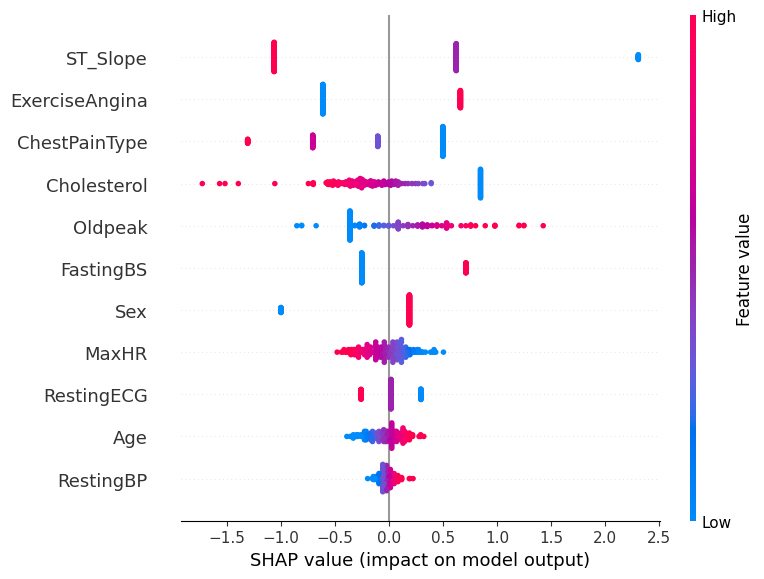

In [35]:
import shap

# Initialize SHAP explainer for logistic regression
explainer = shap.LinearExplainer(log_model, scaled_X_train)

# Get SHAP values for the test set
shap_values = explainer.shap_values(scaled_X_test)

# Visualize the SHAP summary plot for both classes
shap.summary_plot(shap_values, scaled_X_test, feature_names=X.columns)


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



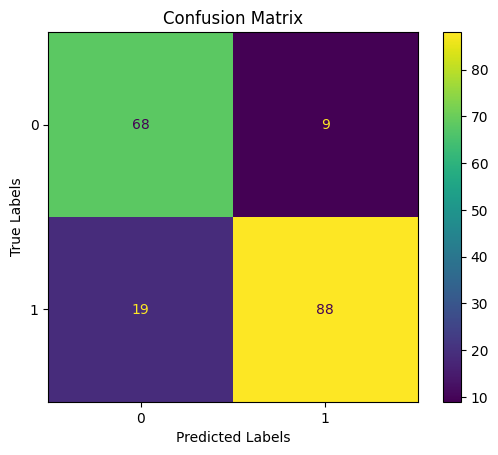

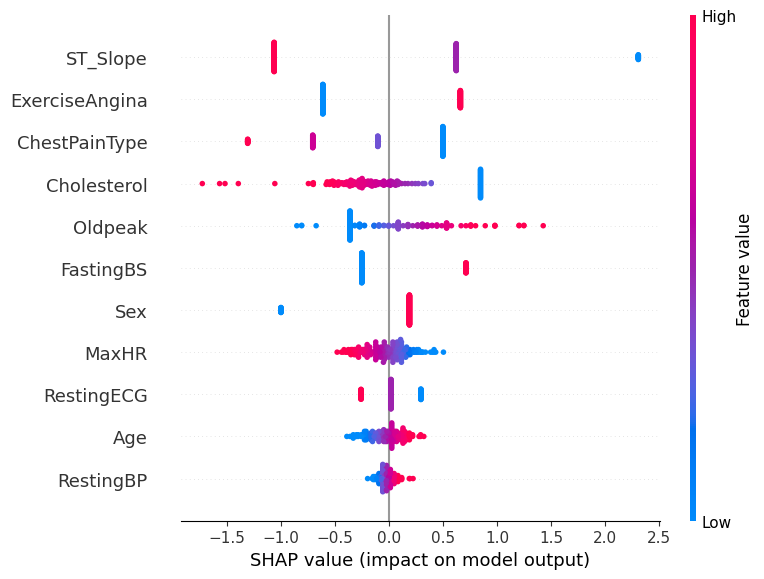

In [38]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load your dataset (replace with your dataset)
# df = pd.read_csv('your_dataset.csv')
# X = df.drop('target', axis=1)  # Assuming target column is 'target'
# y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (if needed)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Predictions and accuracy
y_pred = log_model.predict(scaled_X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model
joblib.dump(log_model, 'logreg_model.pkl')

# Explain the model with SHAP
explainer = shap.Explainer(log_model, scaled_X_train)
shap_values = explainer(scaled_X_test)  # Corrected variable name

# Visualize SHAP values (Global explanation - Feature importance)
shap.summary_plot(shap_values, scaled_X_test, feature_names=X.columns)

# Visualize SHAP values for a single prediction (Local explanation)
shap.initjs()  # Initialize SHAP visualizations
shap.force_plot(shap_values[0].base_values, shap_values[0].values, features=scaled_X_test[0], feature_names=X.columns)


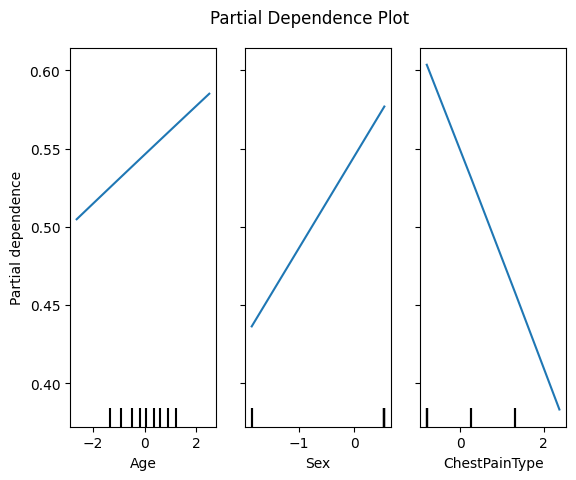

In [41]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Specify the features you want to analyze (for example, features [0, 1, 2])
features = [0, 1, 2]

# Generate the Partial Dependence Plot
disp = PartialDependenceDisplay.from_estimator(log_model, 
                                              X=scaled_X_train,  # Use the scaled training data directly
                                              features=features, 
                                              feature_names=X.columns)

# Customize the plot
plt.suptitle('Partial Dependence Plot')
plt.subplots_adjust(top=0.9)  # Adjust the title position
plt.show()


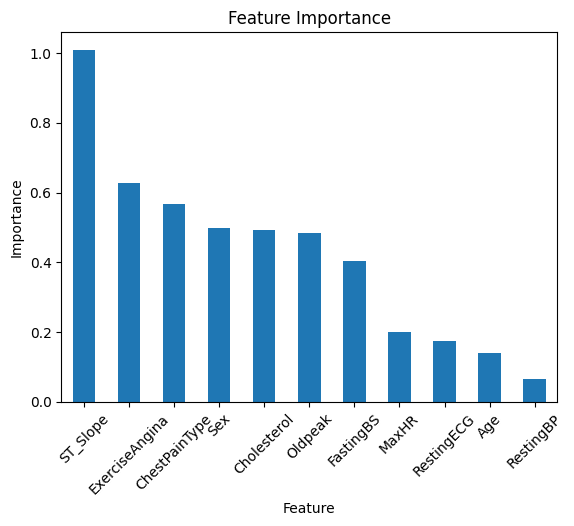

In [42]:
import numpy as np
import pandas as pd

# Get feature importance from the Logistic Regression coefficients
feature_importance = np.abs(log_model.coef_[0])

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


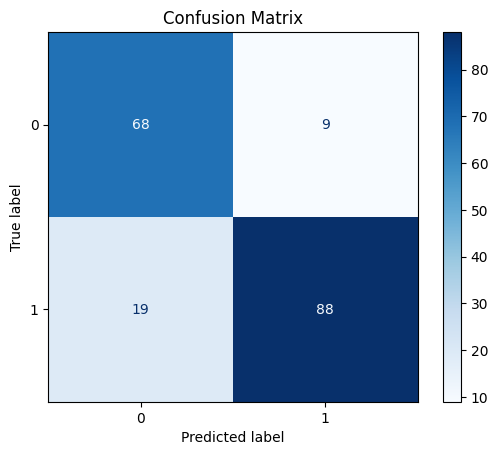

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Print classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [27]:
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Step 1: Load your dataset
df = pd.read_csv(r'C:\Users\Bhoomika\heart.csv')  # Replace with your actual dataset file path

# Step 2: Define 'X' and 'y'
# X: Feature matrix (all columns except the target column)
# y: Target variable (the column you're trying to predict)
X = df.drop('HeartDisease', axis=1)  # 'HeartDisease' is the target column
y = df['HeartDisease']  # 'HeartDisease' is the target column

# Step 3: Check for non-numeric columns and encode them if needed
for col in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardizing the data (feature scaling)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Step 6: Initialize and train the logistic regression model
log_model = LogisticRegression(max_iter=10000)
log_model.fit(scaled_X_train, y_train)

# Step 7: Make predictions and calculate accuracy
y_pred = log_model.predict(scaled_X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Step 8: Generate confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Step 9: Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Step 10: Save the trained model to a .pkl file using pickle
model_filename = r'C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(log_model, f)
print(f"Model saved as {model_filename}")


Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Model saved as C:\Users\Bhoomika\Desktop\logreg_model_high_accuracy.pkl


In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Bhoomika\Desktop\heart.csv")  # Replace with your dataset
features = list(data.columns)
features.remove("HeartDisease")  # Replace with your target column name
print(features)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [4]:
import pandas as pd
data = pd.read_csv(r"D:\heartp\heart.csv")  # Replace with your dataset
features = list(data.columns)
features.remove("HeartDisease")  # Replace with your target column name
print(features)


['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']


From the above results, we can choose the model based on the required application:


1. For predicting more positive cases we can choose the KNN model as it offers the best recall
2.  For having a more balanced approach and more overall accuracy, we can choose Logistic regression model



In [23]:
import streamlit as st
import joblib
import numpy as np

# Load the pre-trained model from the specified path
model = joblib.load(r"C:\Users\Bhoomika\Downloads\logreg.pkl")

# Set up the Streamlit UI components
st.title("Machine Learning Model Interface")

# Add input fields for model parameters (adjust according to your model's requirements)
age = st.number_input('Age', min_value=18, max_value=100, value=30)
height = st.number_input('Height (in cm)', min_value=100, max_value=250, value=170)
weight = st.number_input('Weight (in kg)', min_value=30, max_value=200, value=70)

# Button to make the prediction
if st.button('Predict'):
    # Prepare input data for the model (adjust according to your model's input format)
    input_data = np.array([[age, height, weight]])

    # Make prediction
    prediction = model.predict(input_data)

    # Display the prediction result
    st.write(f"Prediction result: {prediction[0]}")


ModuleNotFoundError: No module named 'streamlit'